In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


data = pd.read_csv('D:\\3-2\\Machine_learning_lab\\Frauddetection\\onlinefraud.csv')
data.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [30]:

data.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1048570,95,CASH_OUT,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0,0
1048571,95,PAYMENT,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0,0
1048572,95,PAYMENT,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0,0
1048573,95,PAYMENT,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0,0
1048574,95,PAYMENT,11450.03,C1264356443,80584.95,69134.92,M677577406,0.00,0.00,0,0


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
 10  isFlaggedFraud  1048575 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 88.0+ MB


In [32]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1048575.0
mean,2.696617e+01,1.586670e+05,8.740095e+05,8.938089e+05,9.781600e+05,1.114198e+06,1.089097e-03,0.0
std,1.562325e+01,2.649409e+05,2.971751e+06,3.008271e+06,2.296780e+06,2.416593e+06,3.298351e-02,0.0
min,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,1.500000e+01,1.214907e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
50%,2.000000e+01,7.634333e+04,1.600200e+04,0.000000e+00,1.263772e+05,2.182604e+05,0.000000e+00,0.0
75%,3.900000e+01,2.137619e+05,1.366420e+05,1.746000e+05,9.159235e+05,1.149808e+06,0.000000e+00,0.0
max,9.500000e+01,1.000000e+07,3.890000e+07,3.890000e+07,4.210000e+07,4.220000e+07,1.000000e+00,0.0


In [33]:

data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [34]:
data.dropna()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1048570,95,CASH_OUT,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0,0
1048571,95,PAYMENT,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0,0
1048572,95,PAYMENT,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0,0
1048573,95,PAYMENT,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0,0


<Axes: xlabel='type', ylabel='count'>

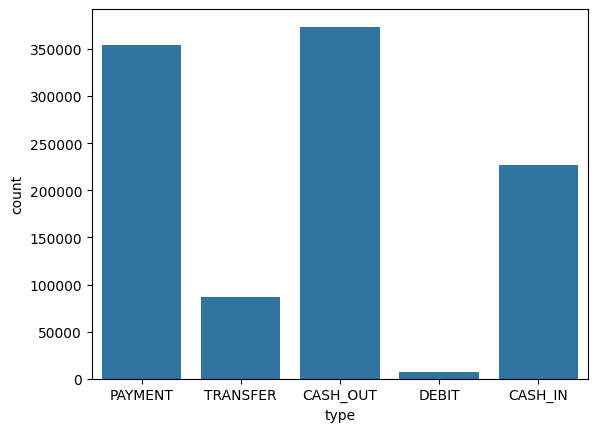

In [35]:

import seaborn as sns
sns.countplot(x='type', data=data)


In [36]:

# sns.barplot(x='type', y='amount', data=data)

In [37]:

# import seaborn as sns
# import matplotlib.pyplot as plt

# # Assuming 'data' contains your dataset
# sns.scatterplot(data=data, x='type', y='amount')
# plt.xlabel('Transactional Amount')
# plt.ylabel('Transaction Type')
# plt.title('Scatter Plot of Transactional Type vs. Transaction Amount')
# plt.show()


In [38]:


# import seaborn as sns
# import matplotlib.pyplot as plt

# # Assuming 'data' contains your dataset
# sns.histplot(data=data, x='type', hue='amount', multiple='stack')
# plt.xlabel('Transactional Amount')
# plt.ylabel('Frequency')
# plt.title('Histogram of Transactional Amount by Transaction Type')
# plt.show()


In [39]:
data['isFraud'].value_counts()

isFraud
0    1047433
1       1142
Name: count, dtype: int64

In [40]:
from sklearn.utils import resample
# Separate majority and minority classes
df_majority = data[data['isFraud'] == 0.0]
df_minority = data[data['isFraud'] == 1.0]

# Downsample majority class
df_majority_downsampled = resample(df_majority,
                                   replace=False,    # sample without replacement
                                   n_samples=8213,   # to match minority class
                                   random_state=42)  # reproducible results

# Combine downsampled majority class with minority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

df_downsampled

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
939536,43,CASH_IN,149152.92,C532400860,52679.00,201831.92,C1098293483,0.00,0.00,0,0
612979,34,CASH_IN,170234.08,C1410895046,2723.00,172957.08,C617376203,0.00,0.00,0,0
583000,33,CASH_OUT,99727.50,C1060972913,21129.00,0.00,C1803348615,88581.86,188309.36,0,0
147533,12,PAYMENT,18065.94,C1274736812,0.00,0.00,M483573807,0.00,0.00,0,0
530773,20,TRANSFER,43627.23,C779675334,0.00,0.00,C1646718574,84077.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1047888,95,CASH_OUT,56745.14,C526144262,56745.14,0.00,C79051264,51433.88,108179.02,1,0
1048221,95,TRANSFER,33676.59,C732111322,33676.59,0.00,C1140210295,0.00,0.00,1,0
1048222,95,CASH_OUT,33676.59,C1000086512,33676.59,0.00,C1759363094,0.00,33676.59,1,0
1048323,95,TRANSFER,87999.25,C927181710,87999.25,0.00,C757947873,0.00,0.00,1,0


In [41]:
df_downsampled['isFraud'].value_counts()
df_downsampled

X = df_downsampled.drop(['step','isFraud', 'type', 'nameOrig', 'nameDest','isFlaggedFraud'], axis=1)
y = df_downsampled['isFraud']
X

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
939536,149152.92,52679.00,201831.92,0.00,0.00
612979,170234.08,2723.00,172957.08,0.00,0.00
583000,99727.50,21129.00,0.00,88581.86,188309.36
147533,18065.94,0.00,0.00,0.00,0.00
530773,43627.23,0.00,0.00,84077.00,0.00
...,...,...,...,...,...
1047888,56745.14,56745.14,0.00,51433.88,108179.02
1048221,33676.59,33676.59,0.00,0.00,0.00
1048222,33676.59,33676.59,0.00,0.00,33676.59
1048323,87999.25,87999.25,0.00,0.00,0.00


In [42]:
# import seaborn as sns
# plt.figure(figsize=(12, 6))
# sns.heatmap(X.corr(),
# 			cmap='BrBG',
# 			fmt='.2f',
# 			linewidths=2,
# 			annot=True)

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
	X, y, test_size=0.3, random_state=42)


In [44]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score as ras
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [45]:
X_train

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
455954,174528.34,0.00,0.00,512613.45,687141.79
606183,125546.63,6582.00,0.00,285551.96,382784.10
36898,127965.22,0.00,0.00,667677.77,1021943.57
746071,54926.84,6781025.01,6835951.85,2693192.89,2638266.05
2209,373610.77,17159.94,0.00,38202.14,502480.02
...,...,...,...,...,...
826897,89107.22,5056.00,0.00,0.00,89107.22
525861,10043.08,35802.00,25758.92,0.00,0.00
33350,136009.31,0.00,0.00,4791597.89,5326469.10
611435,59536.86,104530.00,44993.14,1782602.61,1854012.53


In [46]:
models = [LogisticRegression(), XGBClassifier(),
          SVC(kernel='rbf', probability=True),
					DecisionTreeClassifier(),
		RandomForestClassifier(n_estimators=7,
								criterion='entropy',
								random_state=7)]

for i in range(len(models)):
	models[i].fit(X_train, y_train)
	print(f'{models[i]} : ')

	train_preds = models[i].predict_proba(X_train)[:, 1]
	print('Training Accuracy : ', ras(y_train, train_preds))

	y_preds = models[i].predict_proba(X_test)[:, 1]
	print('Validation Accuracy : ', ras(y_test, y_preds))
	print()


LogisticRegression() : 
Training Accuracy :  0.9717201080139886
Validation Accuracy :  0.974961253248766

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training Accuracy :  0.999984918490408
Validation Accuracy :  0.9950261093492931

SVC(probability=True) : 
Training Accuracy :  0.919

In [47]:


import pandas as pd
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier

# Load the test data
test_data = pd.read_csv('D:\\3-2\\Machine_learning_lab\\Frauddetection\\test.csv')

# test_data=pd.DataFrame({
#     'step':[1],
#     'type':['TRANSFER'],
#     'amount': [2806],  # Transaction amount
#     'nameOrig':['C1305486145'],
#     'oldbalanceOrg':[2806],
#     'newbalanceOrig':[0],
#     'nameDest':['C553264065'],
#     'oldbalanceDest':[0],
#     'newbalanceDest':[0],
#     'isFlaggedFraud':[0],
#     'isFraud':[1]
# })

# Separate features and target variable
X_new = test_data.drop(['step','isFraud', 'type', 'nameOrig', 'nameDest','isFlaggedFraud'], axis=1) # Assuming 'isFraud' is the target variable
y_new = test_data['isFraud']




# Load the trained XGBoost model (replace 'xgboost_model.model' with the path to your trained model file)
model = XGBClassifier()
# model.load_model('xgboost_model.model')
model.fit(X_train, y_train)

# Preprocess the test data using the same scaler used for training data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_new)
print(model.predict(X_new))


[0 0 1 1 1 0 0 1 1 1 1 1 1 0]


In [48]:

# # Make predictions on the test data
# # fraud_probabilities = model.predict_proba(X_test_scaled)[:, 1]  # Probability of being fraudulent

# # Print the predicted fraud probabilities
# # print("Predicted fraud probabilities:", fraud_probabilities)


# from sklearn.metrics import confusion_matrix
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Assuming models[0] is your trained model
# y_pred = models[0].predict(X_test)
# cm = confusion_matrix(y_test, y_pred)

# # Plotting the confusion matrix
# plt.figure(figsize=(8, 6))
# sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
# plt.xlabel('Predicted labels')
# plt.ylabel('True labels')
# plt.title('Confusion Matrix')
# plt.show()


# from sklearn.metrics import confusion_matrix
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Assuming models[1] is your trained model
# y_pred = models[1].predict(X_test)
# cm = confusion_matrix(y_test, y_pred)

# # Plotting the confusion matrix
# plt.figure(figsize=(8, 6))
# sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
# plt.xlabel('Predicted labels')
# plt.ylabel('True labels')
# plt.title('Confusion Matrix')
# plt.show()


# from sklearn.metrics import confusion_matrix
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Assuming models[2] is your trained model
# y_pred = models[2].predict(X_test)
# cm = confusion_matrix(y_test, y_pred)

# # Plotting the confusion matrix
# plt.figure(figsize=(8, 6))
# sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
# plt.xlabel('Predicted labels')
# plt.ylabel('True labels')
# plt.title('Confusion Matrix')
# plt.show()


# from sklearn.metrics import confusion_matrix
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Assuming models[2] is your trained model
# y_pred = models[3].predict(X_test)
# cm = confusion_matrix(y_test, y_pred)

# # Plotting the confusion matrix
# plt.figure(figsize=(8, 6))
# sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
# plt.xlabel('Predicted labels')
# plt.ylabel('True labels')
# plt.title('Confusion Matrix')
# plt.show()




In [49]:
import pickle
with open('model.pkl','wb') as files:
    pickle.dump(model,files)